In [1]:
#import the required libraries for the EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

In [2]:
# Get the absolute path to the parent directory
parent_dir = os.path.dirname(os.getcwd())

# Add the parent directory to sys.path
sys.path.append(parent_dir)
from scripts.handler import Handler
from scripts import visualizer

In [3]:
def loding_data(path=None):
    try: 
        df = pd.read_csv(path, sep="|", low_memory=False, encoding='utf-8')
    except Exception as e:
        print(f"Error loading the DataFrame: {e}")
        return None
    else:
        print(df.head())
        return df

In [4]:
# loding the data
path = "../data/MachineLearningRating_v3.txt"
acis_df = loding_data(path)
if acis_df is not None:
    print(acis_df.sample(3))
else:
    print("Failed to load the DataFrame.")

   UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
0               145249     12827  2015-03-01 00:00:00             True   
1               145249     12827  2015-05-01 00:00:00             True   
2               145249     12827  2015-07-01 00:00:00             True   
3               145255     12827  2015-05-01 00:00:00             True   
4               145255     12827  2015-07-01 00:00:00             True   

  Citizenship          LegalType Title Language                 Bank  \
0              Close Corporation    Mr  English  First National Bank   
1              Close Corporation    Mr  English  First National Bank   
2              Close Corporation    Mr  English  First National Bank   
3              Close Corporation    Mr  English  First National Bank   
4              Close Corporation    Mr  English  First National Bank   

       AccountType  ...                    ExcessSelected CoverCategory  \
0  Current account  ...             Mobility - 

In [5]:
df_obj = Handler(acis_df)

In [6]:
acis_df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [6]:
df_obj.data_overview()

Number of rows: 1000098
Number of columns: 52

Data Types:
UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodyt

In [7]:
df_obj.check_duplicate()


Duplicated values:
0 duplicated rows


In [8]:
df_obj.calculate_missing_percentage()

                          Missing Values Percentage Missing
UnderwrittenCoverID                    0              0.00%
PolicyID                               0              0.00%
TransactionMonth                       0              0.00%
IsVATRegistered                        0              0.00%
Citizenship                            0              0.00%
LegalType                              0              0.00%
Title                                  0              0.00%
Language                               0              0.00%
Bank                              145961             14.59%
AccountType                        40232              4.02%
MaritalStatus                       8259              0.83%
Gender                              9536              0.95%
Country                                0              0.00%
Province                               0              0.00%
PostalCode                             0              0.00%
MainCrestaZone                         0

In [9]:
# drop columns
df_obj.drop_columns()

# fill nan value 
acis_df['Bank'].fillna('Unknown', inplace=True)
acis_df['AccountType'].fillna('Unknown', inplace=True)

#drop cols that contains missing value
acis_df.dropna(inplace=True)

In [10]:
# Test
df_obj.calculate_missing_percentage()

                          Missing Values Percentage Missing
UnderwrittenCoverID                    0              0.00%
PolicyID                               0              0.00%
TransactionMonth                       0              0.00%
IsVATRegistered                        0              0.00%
Citizenship                            0              0.00%
LegalType                              0              0.00%
Title                                  0              0.00%
Language                               0              0.00%
Bank                                   0              0.00%
AccountType                            0              0.00%
MaritalStatus                          0              0.00%
Gender                                 0              0.00%
Country                                0              0.00%
Province                               0              0.00%
PostalCode                             0              0.00%
MainCrestaZone                         0

In [11]:
# convert object dtype into datetime
acis_df['TransactionMonth'] = pd.to_datetime(acis_df['TransactionMonth']).dt.month_name()

In [12]:
# Handling outliers
clean_df = df_obj.remove_iqr_outliers() 

# Storing Clean data

In [14]:
# dorp columns that contains missing values more than 60
clean_df.to_csv("../data/clean_acis_data.csv")

## Univariate Analysis
Distribution of Variables: Plot histograms for numerical columns and bar charts for categorical columns to understand distributions.

In [3]:
try:
    clean_acis_df = pd.read_csv("../data/clean_acis_data.csv", low_memory=False)
    #clean_acis_df.head()
except Exception as e:
    print(f"Error on loading data: {e}")

In [4]:
num_cols = ['CalculatedPremiumPerTerm', 'TotalPremium',  'TotalClaims']

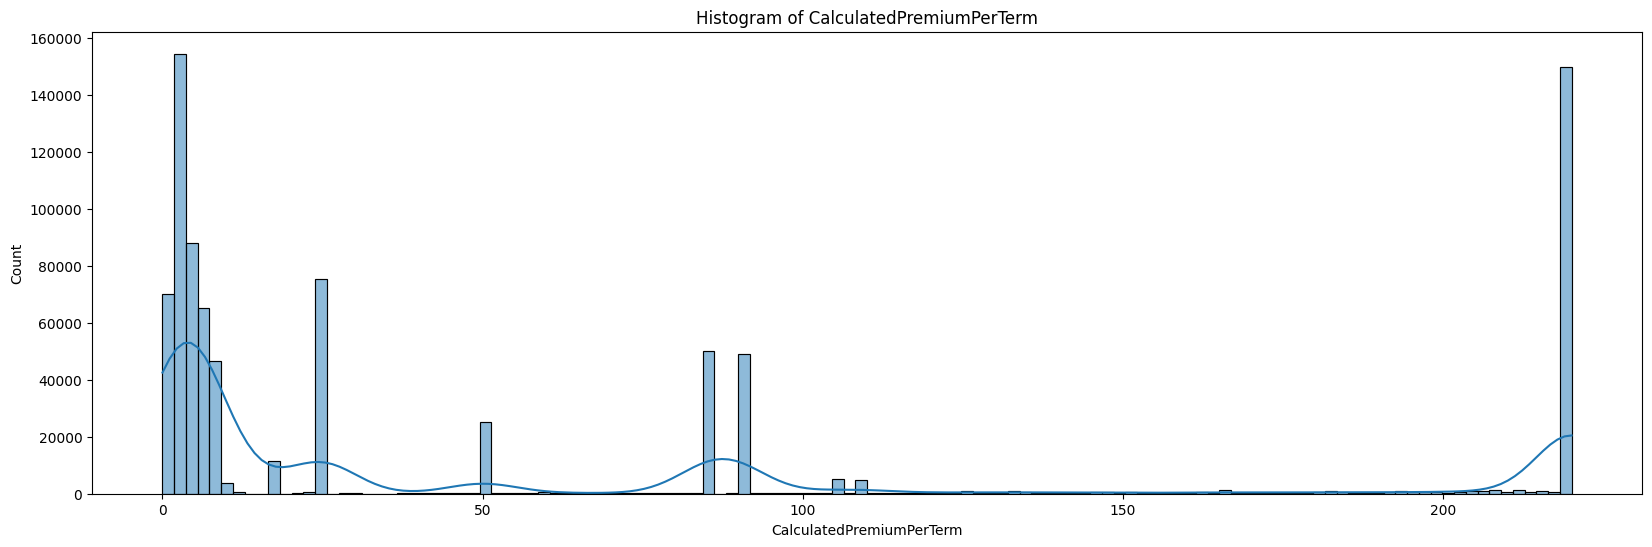

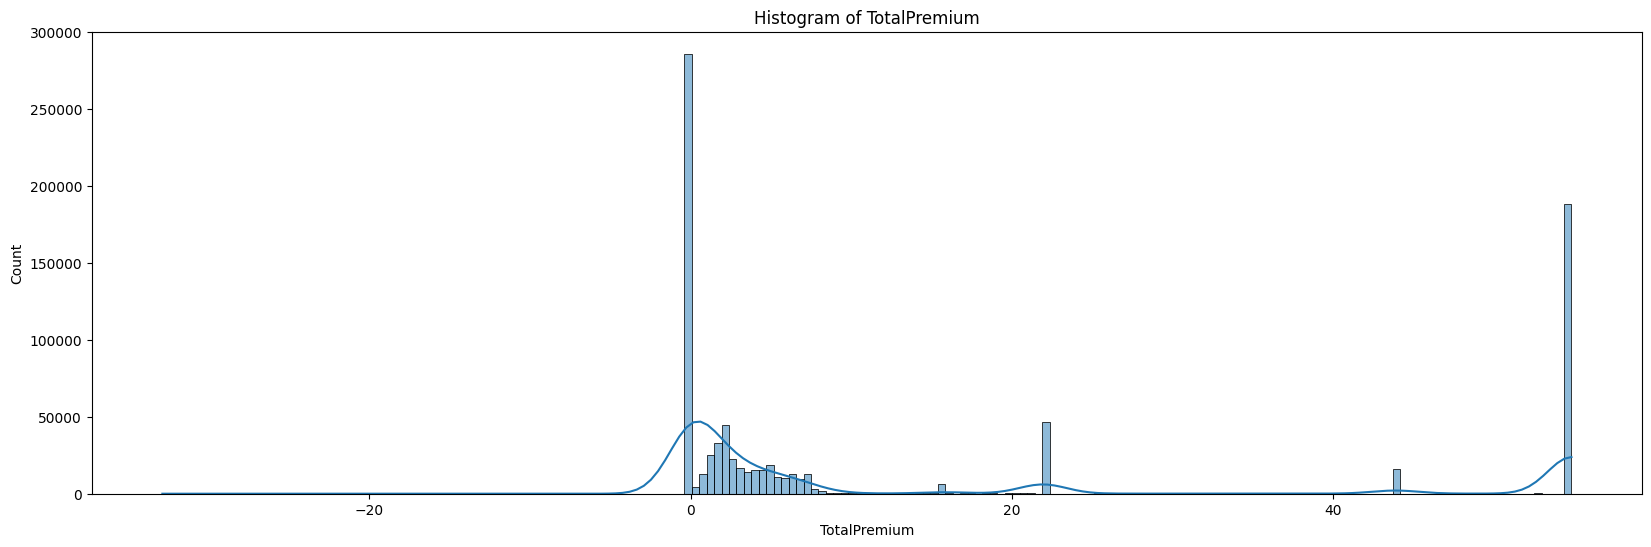

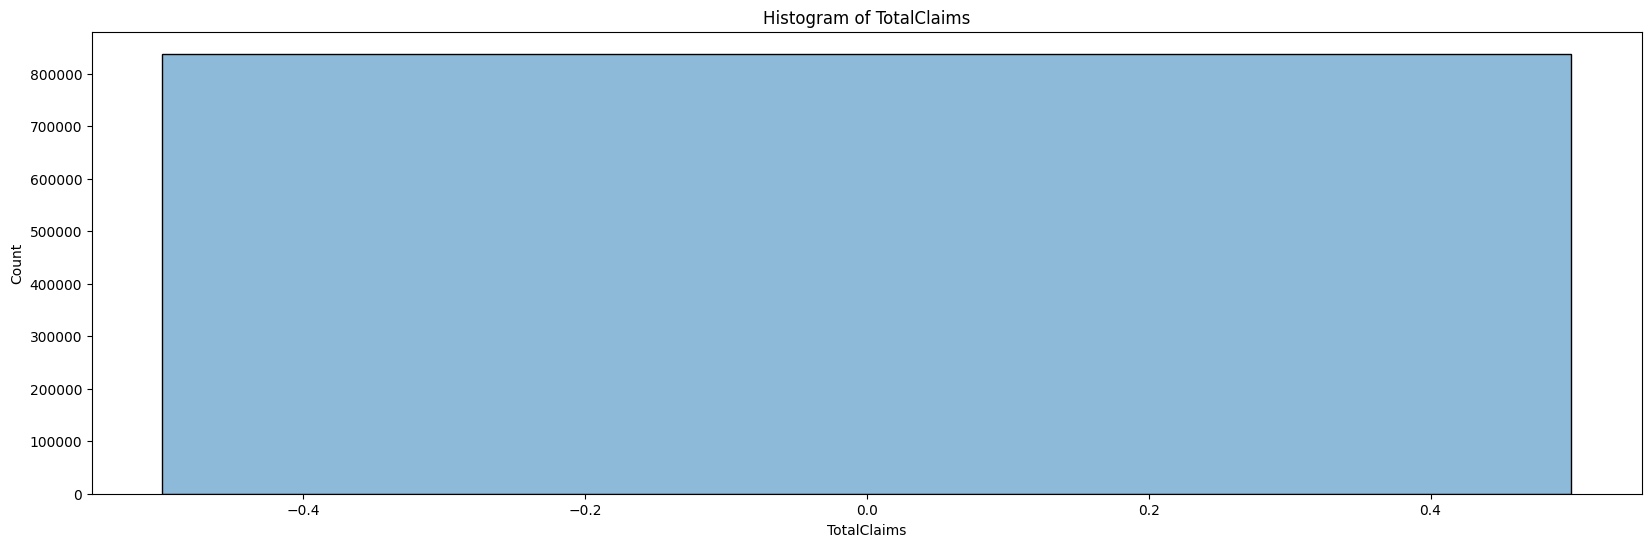

In [5]:
for col in num_cols:
    visualizer.plot_histogram(clean_acis_df, col)

In [6]:
cat_cols = ['TransactionMonth', "Bank", 'Gender', 'LegalType', 'NewVehicle', 'TermFrequency', 'Section', 'Product']

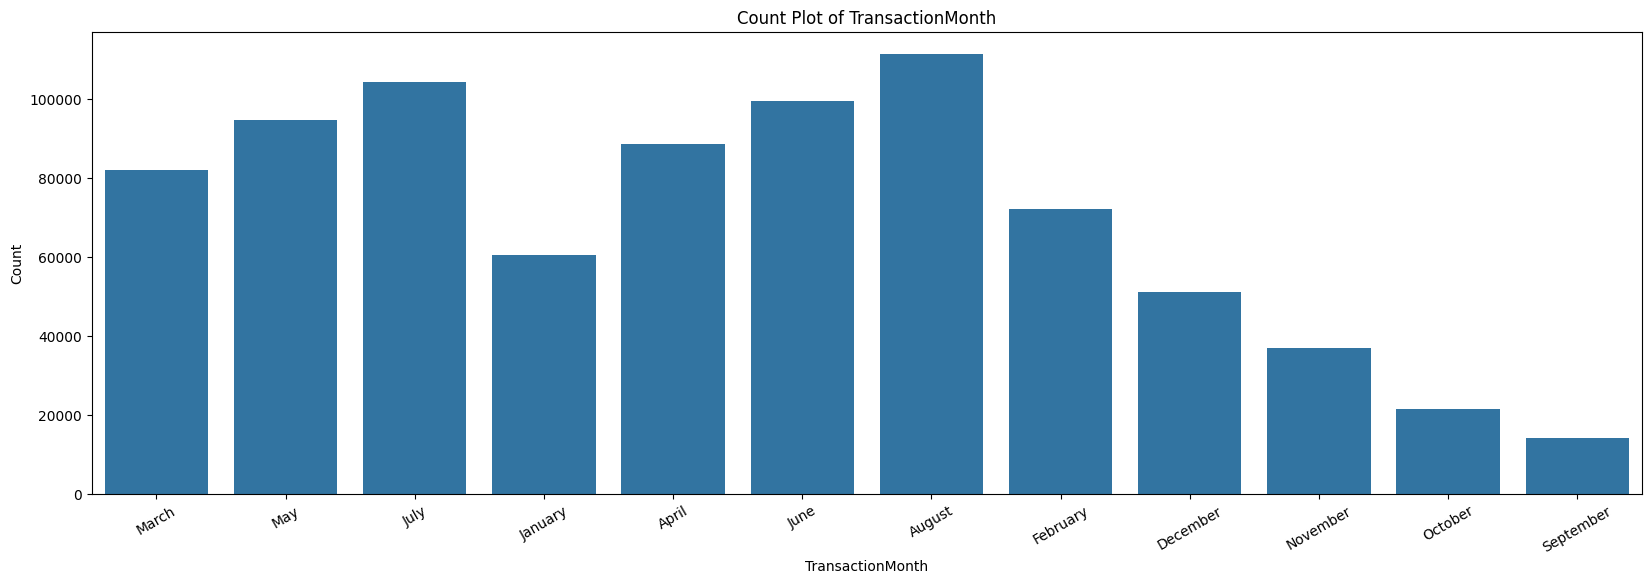

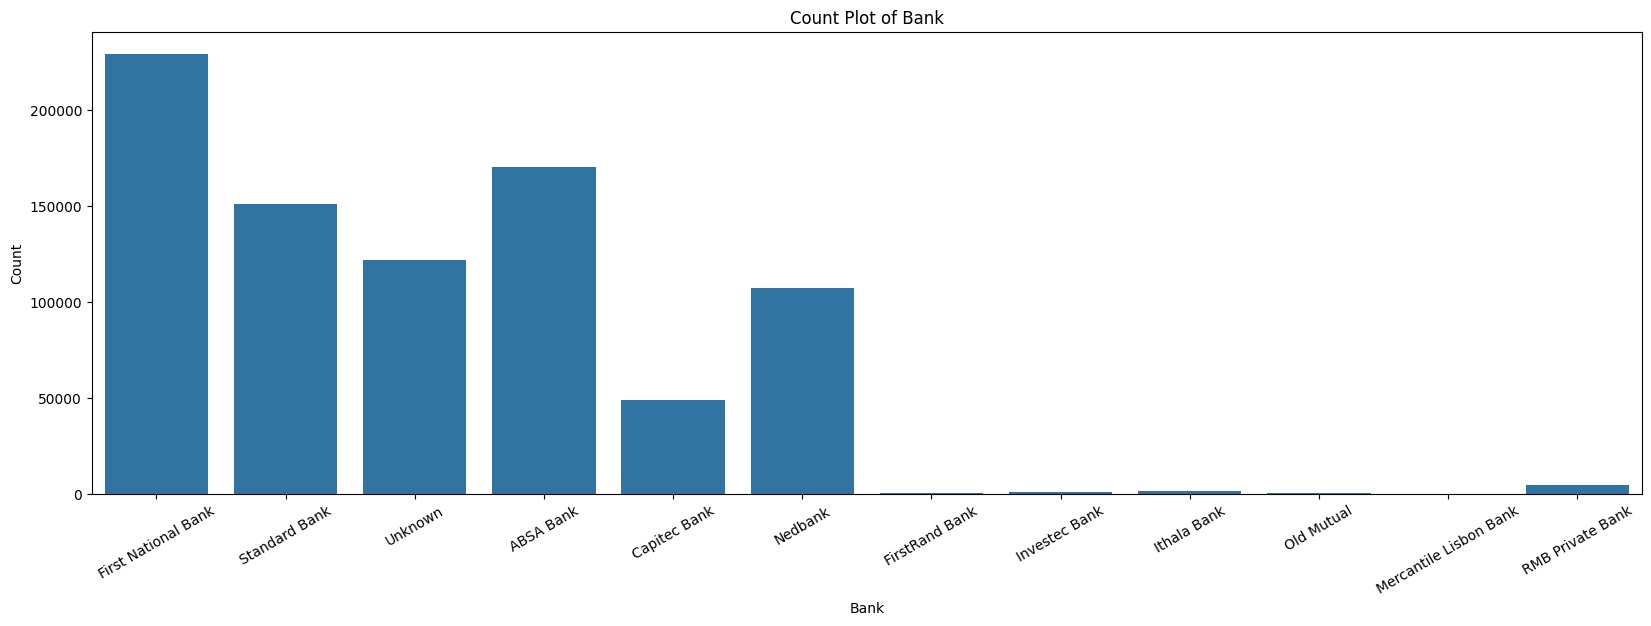

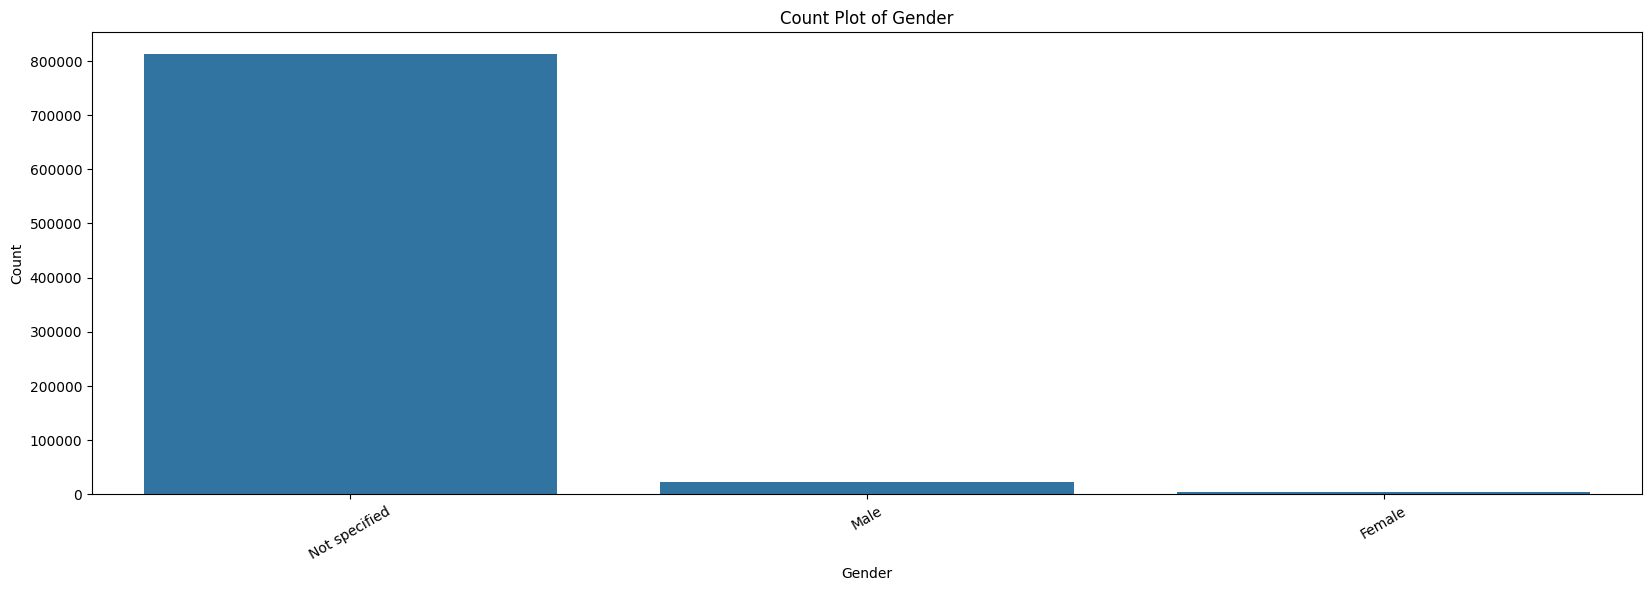

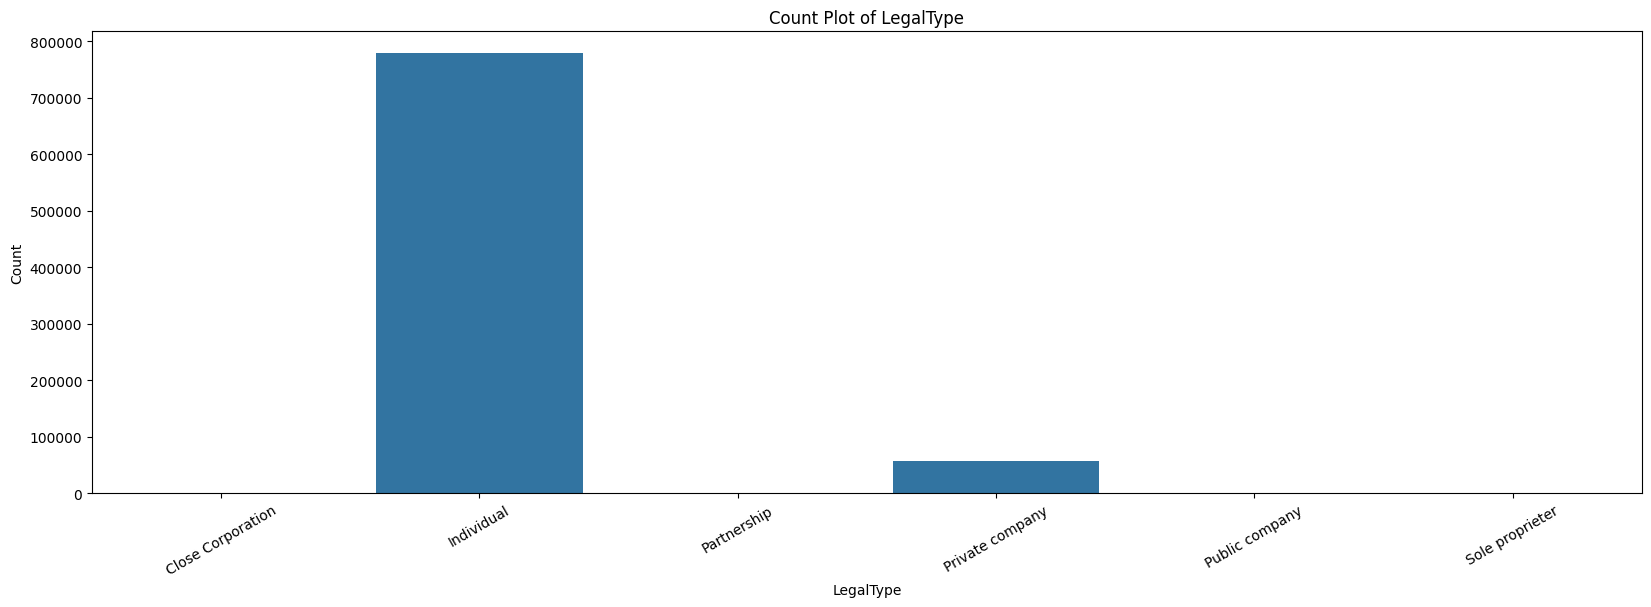

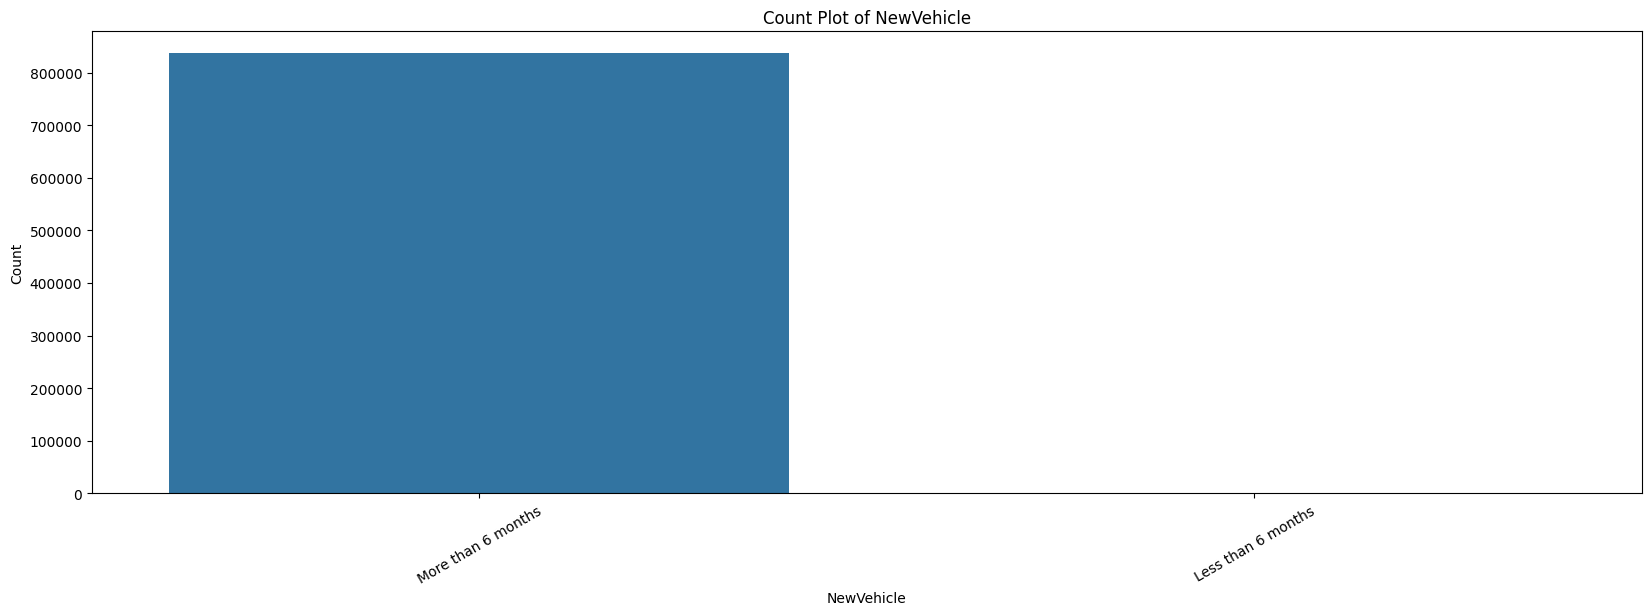

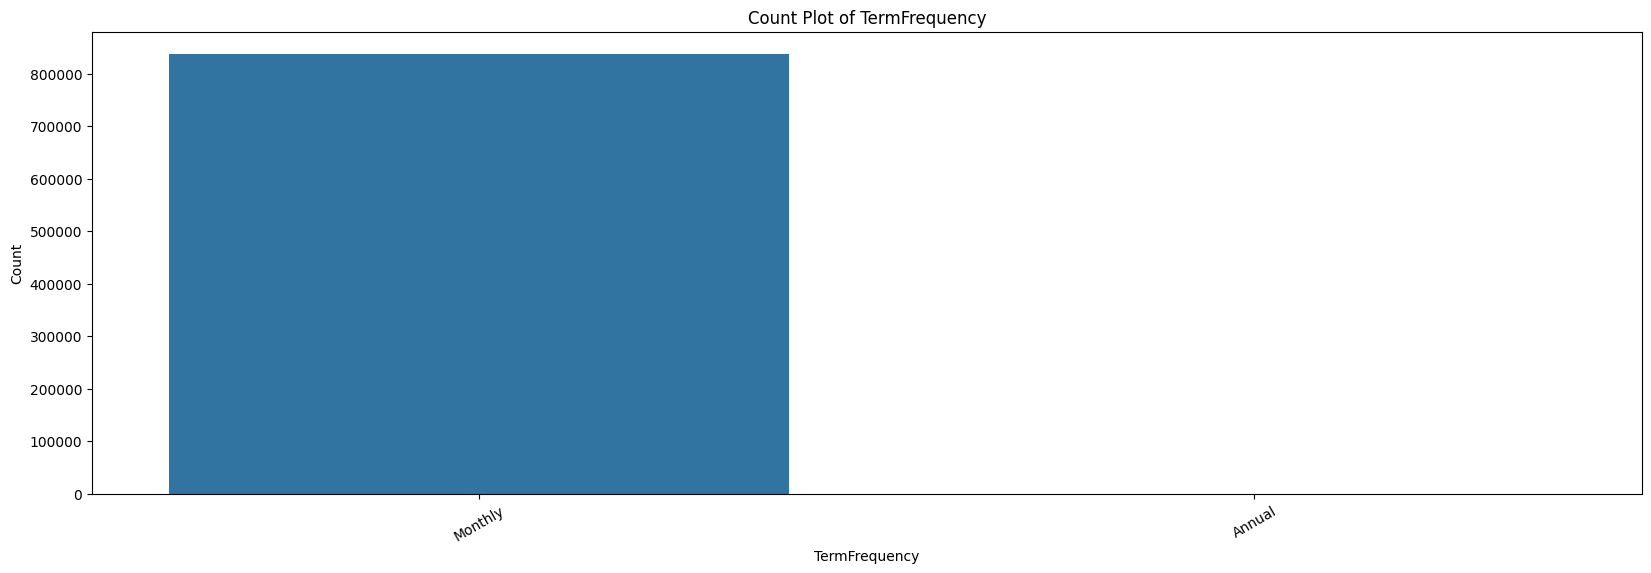

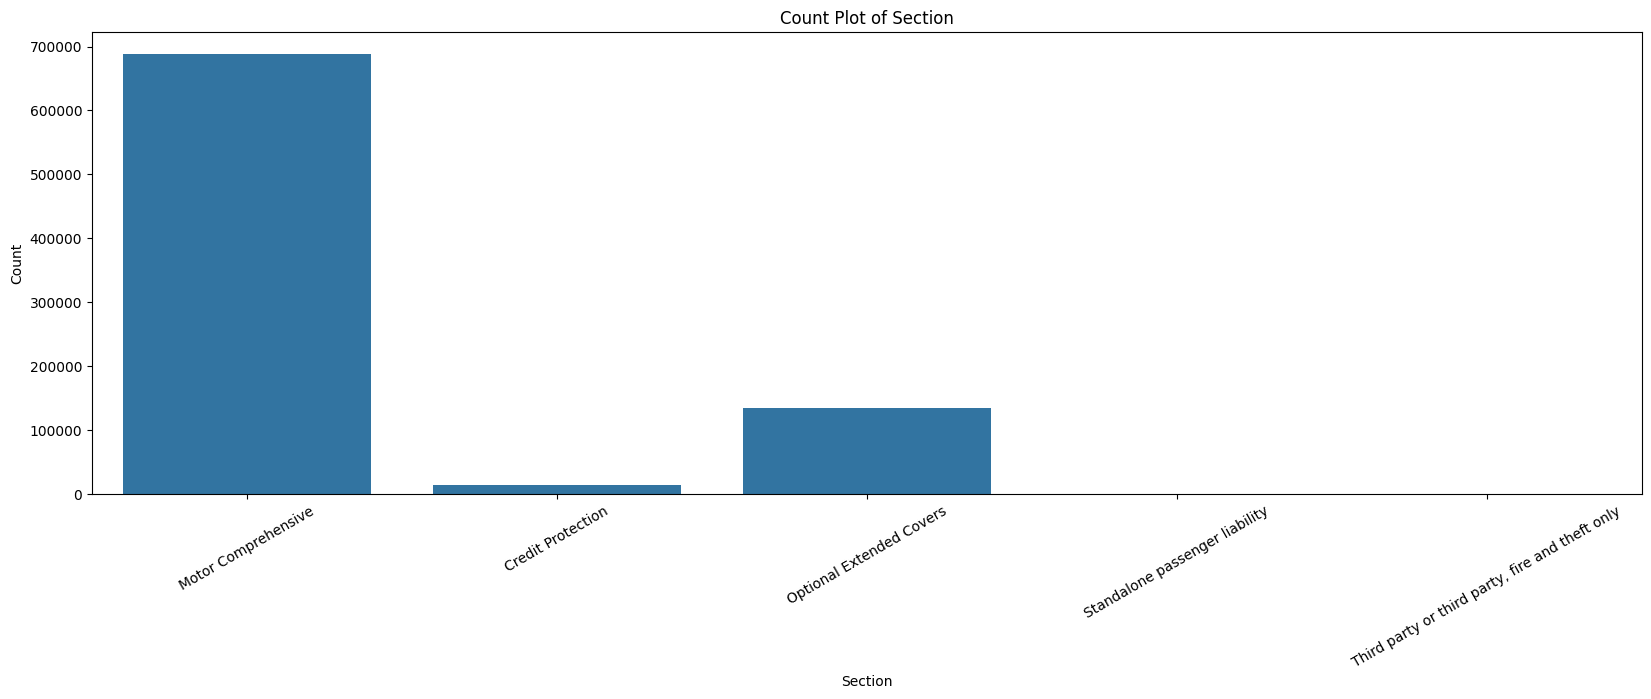

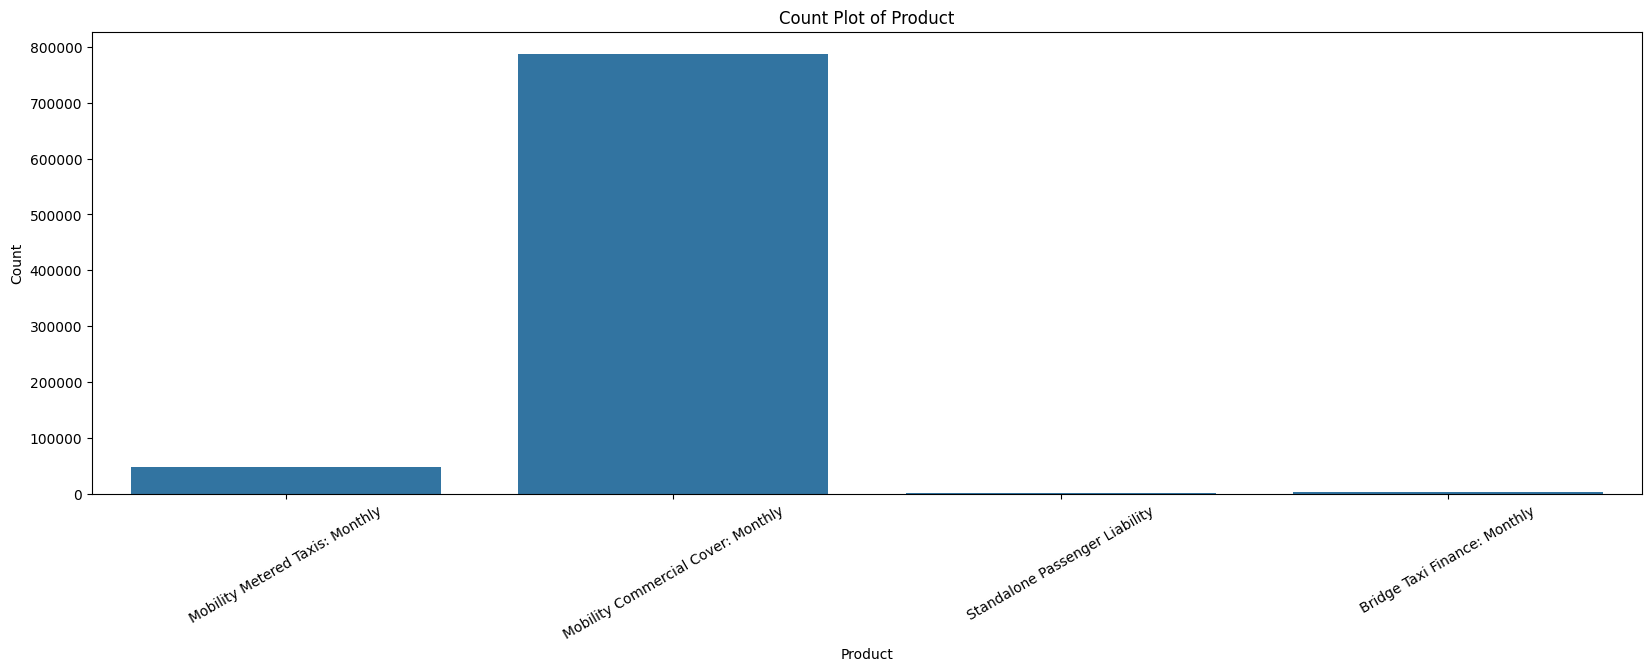

In [7]:
for col in cat_cols:
    visualizer.plot_count(clean_acis_df, col)

# Bivariate Analysis
Correlations and Associations: Explore relationships between the monthly changes TotalPremium and TotalClaims as a function of PostalCode, using scatter plots and correlation matrices.


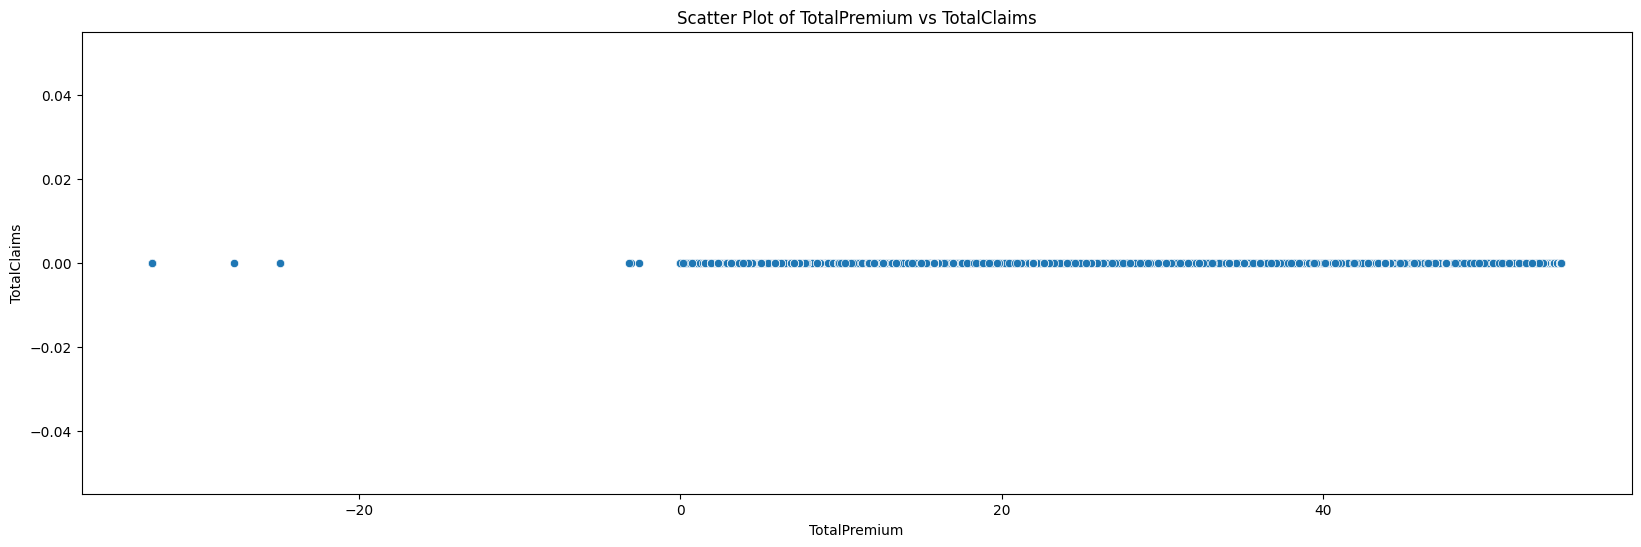

In [8]:
# scatter plot
visualizer.plot_scatter(clean_acis_df, 'TotalPremium', 'TotalClaims')

The above scatter plot shows that there is no corelation between TotalPremium and TotalClaims.

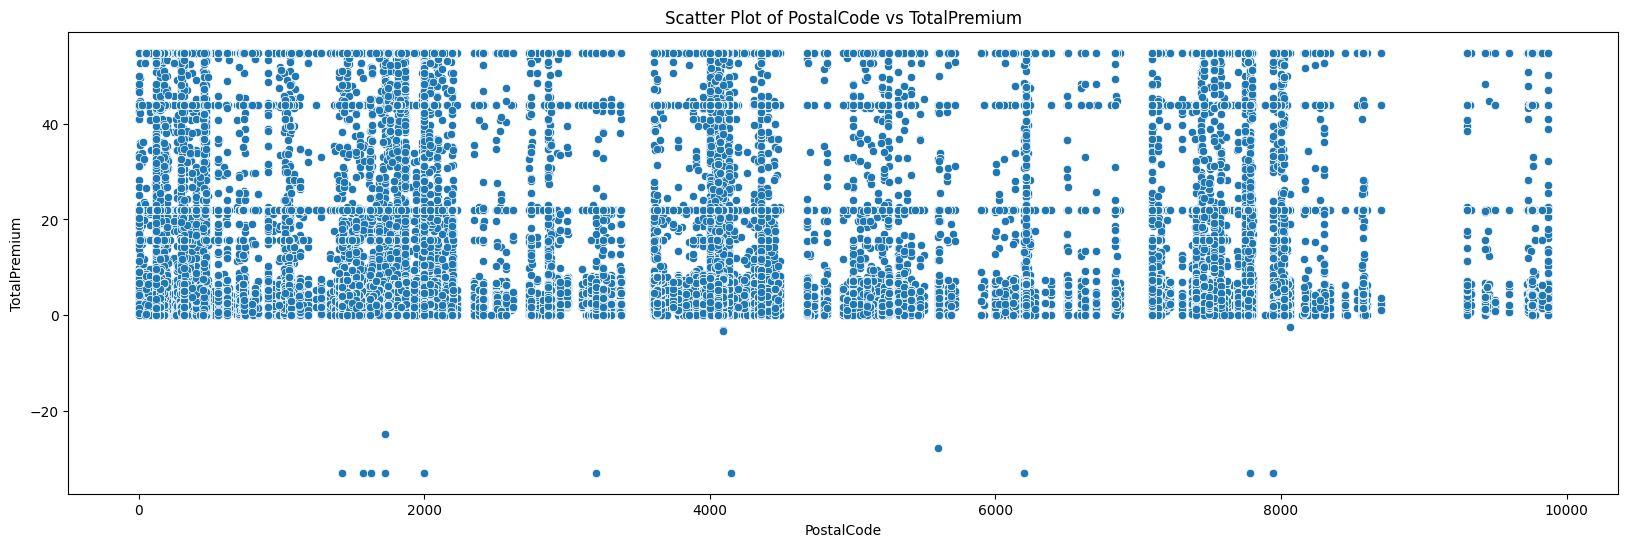

In [9]:
# scatter plot
visualizer.plot_scatter(clean_acis_df, 'PostalCode', 'TotalPremium')

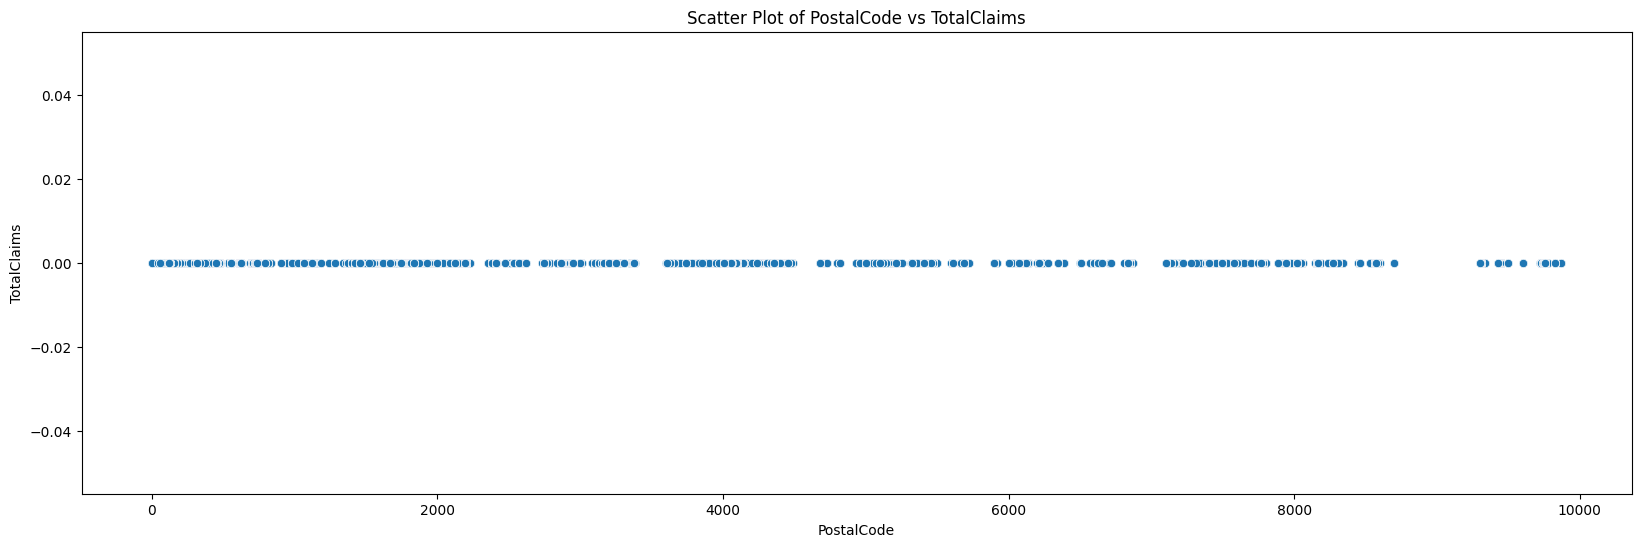

In [10]:
# scatter plot
visualizer.plot_scatter(clean_acis_df, 'PostalCode', 'TotalClaims')

The above scatter plot output show that there is no correlation between PostalCode and TotalClaims.

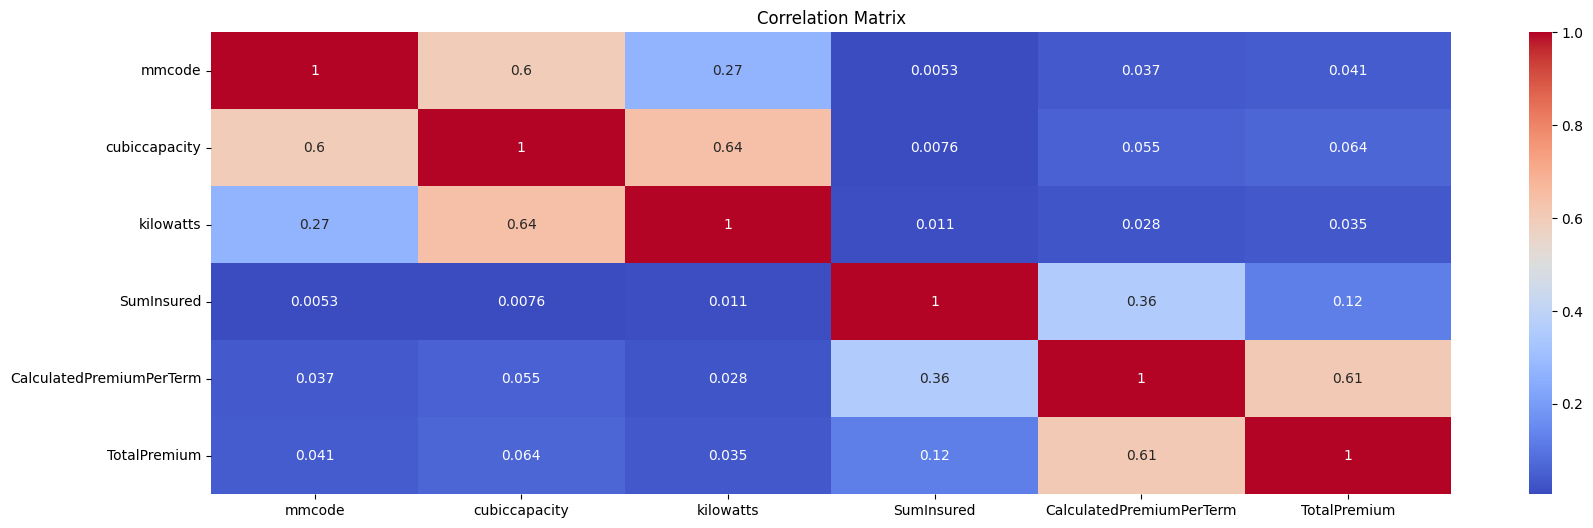

In [11]:
# Heatmap plot
num_df = clean_acis_df.select_dtypes(include=['Float64']).drop(['Cylinders', 'NumberOfDoors', 'TotalClaims'], axis=1)
visualizer.correlation_matrix(num_df)

Here's a breakdown of the correlations:

- mmcode has a moderate positive correlation with cubiccapacity (0.598), suggesting that as cubic capacity increases, so does the likelihood of having a higher mmcode value. It also shows a weaker but still significant positive correlation with kilowatts (0.266).
- cubiccapacity correlates strongly with both mmcode (0.598) and kilowatts (0.639), indicating that these three variables tend to move together. As cubic capacity increases, both mmcode and kilowatts also increase on average.

- kilowatts has a moderate positive correlation with cubiccapacity (0.639) and a weak positive correlation with mmcode (0.266). This suggests that kilowatts and cubic capacity are closely related, with kilowatts also being somewhat related to mmcode.

- SumInsured, CalculatedPremiumPerTerm, and TotalPremium show varying degrees of correlation among themselves, with SumInsured and CalculatedPremiumPerTerm having a very strong positive correlation (0.357), indicating they tend to increase together. Both of these variables have a moderate to strong positive correlation with TotalPremium, further suggesting that as either SumInsured or CalculatedPremiumPerTerm increases, TotalPremium tends to increase as well.

- TotalClaims is missing (represented by NaN), indicating that this variable was not available or applicable for the calculation of correlations with the other variables.

In summary, the data suggests that:

- There is a moderate to strong positive relationship between cubic capacity, mmcode, and kilowatts, indicating that these variables tend to increase together.
- SumInsured and CalculatedPremiumPerTerm are highly correlated with each other and moderately to strongly correlated with TotalPremium, suggesting that these premium-related variables tend to move in similar directions.
- The relationships between these variables could be useful for understanding how changes in one variable might impact others, potentially aiding in predictive modeling or risk assessment scenarios.

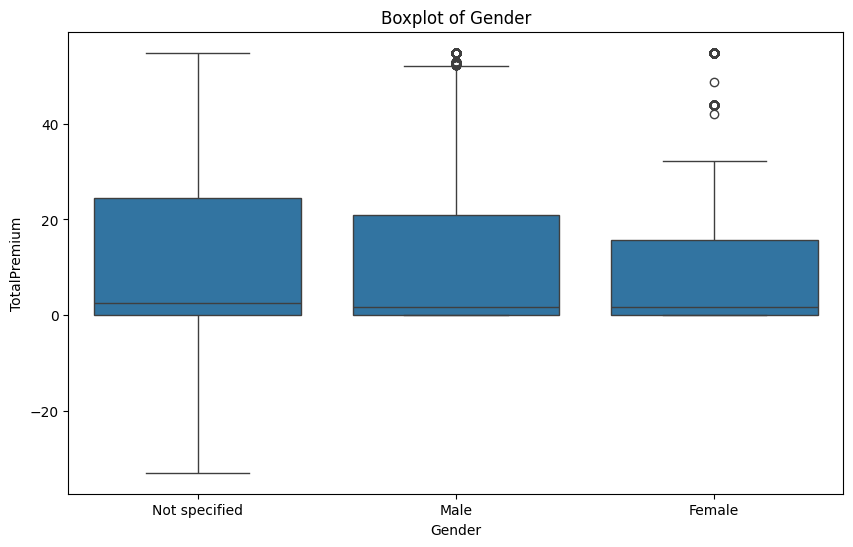

In [22]:
# Box plot
visualizer.plot_boxplot(clean_acis_df, 'Gender', 'TotalPremium')

The above boxblot show that:
- The `Not specified` category generally has higher `TotalPremim` values with a wider range and variablity compared to `Male` and `Female` categories. 
- The `Male` and `Female` categories have similar median values, but the `Female` category shows slightly less variablity within the IQR but more extreme outliers.


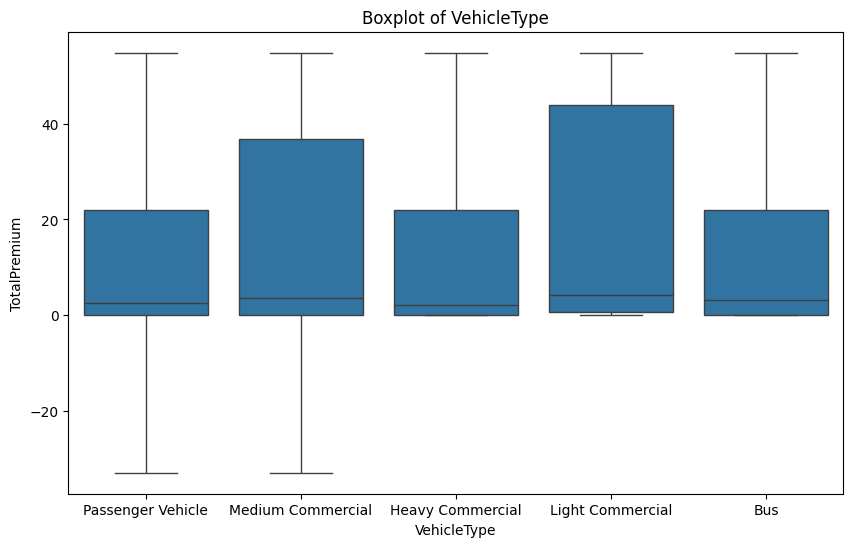

In [45]:
#Box plot
visualizer.plot_boxplot(clean_acis_df, 'VehicleType', 'TotalPremium')

The above box plot visualizes the distributions of `TotalPremium` accross different `VehicleType` categories: Passenger Vehicle, Medium Commercial, Heavy Commercial, Light Commercial, and Bus. Here is detailed point:
- `Medium commercial and light commercial` vehicles tend to have higher `TotalPremium` values compared to other vehicle types. 
- `Heavy commercial` vehicles have the lowest median `TotalPremium`, indicating lower typical values in this category.
-  `Medium commercial and light commercial` vehicles shows higher variablity with in the interquartile range.
- `Passenger vehicle and Bus` have moderate variablity.
- `Heavy commercial` has the least variablity within the IQR.


,Model,0
258,QUANTUM 2.7 SESFIKILE 16s,165784
257,QUANTUM 2.7 SESFIKILE 15s,136641
256,QUANTUM 2.7 SESFIKILE 14s,115947
252,QUANTUM 2.5 D-4D SESFIKILE 16s,92689
192,HiACE SUPER 16 F/Lift,72425
...,...,...
269,SCENIC 1.4 AUTHENTIQUE,1
265,S40 2.0,1
262,RIO 1.4 HIGH 5Dr,1
65,BALLADE 180 E A/T,1
